# Find the Equivalent Ellipse of 9 cm circle

## Copyright information

Copyright © 2015 Simon Biggs

This program is free software: you can redistribute it and/or modify it under the terms of the GNU Affero General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License along with this program. If not, see http://www.gnu.org/licenses/.

## Import modules

In [1]:
import numpy as np
import yaml
from scipy.interpolate import UnivariateSpline

import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

import sys
sys.path.append("../")

from electronfactors.ellipse.equivalent import EquivalentEllipse
from electronfactors.ellipse.fitting import StandardFitEllipse

### Define the cutout

In [2]:
with open("output/AllInputs_guessed.yml", 'r') as inputFile:
    AllInputs_guessed = yaml.load(inputFile)

XCoords = AllInputs_guessed['Simon 9cm circle']['XCoords']
YCoords = AllInputs_guessed['Simon 9cm circle']['YCoords']



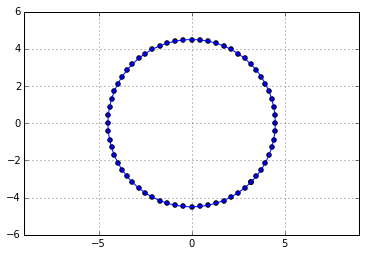

In [3]:
# XCoords = np.array([-4,0,4,0])
# YCoords = np.array([0,4,0,-4])

# XCoords = np.array([-3, 3, 3, -3])
# YCoords = np.array([3, 3, -3, -3])

plt.scatter(XCoords, YCoords)
plt.plot(np.append(XCoords, XCoords[0]), 
         np.append(YCoords, YCoords[0]))
plt.axis("equal")
plt.grid(True)

### Defining the circle fit from example measured factors

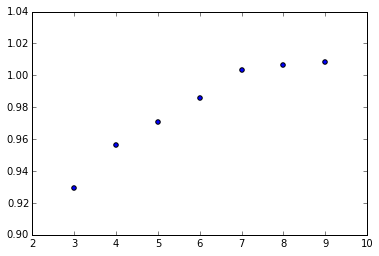

In [4]:
circle_diameter = np.array([3,4,5,6,7,8,9])
circle_factors = np.array([0.9296,0.9562,0.9705,0.9858,1.0032,1.0067,1.0084])

plt.scatter(circle_diameter, circle_factors)

In [5]:
def circle_fit(radii):
    
    circle_radii = circle_diameter/2
    
    spline = UnivariateSpline(circle_radii, circle_factors)
    results = spline(radii)
    
    results[radii>np.max(circle_radii)] = np.max(circle_factors)
    results[radii<np.min(circle_radii)] = 0
    
    return results

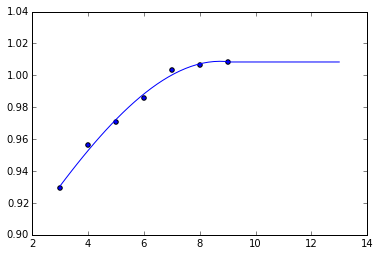

In [6]:
t = np.linspace(circle_diameter.min(),13)
y = circle_fit(t/2)

plt.scatter(circle_diameter, circle_factors)
plt.plot(t,y)

### Finding the equivalent ellipse

In [7]:
# weightedEquivalentEllipse = EquivalentEllipse(x=XCoords, y=YCoords, circle_fit=circle_fit, weighted=True)

# # The ellipse fit method needs to be weighted according to the derivative of `circle_fit`. 
# # Width is more important than length.

In [8]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# patch = des.PolygonPatch(weightedEquivalentEllipse.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
# ax.add_patch(patch)

# patch = des.PolygonPatch(weightedEquivalentEllipse.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
# ax.add_patch(patch)

# patch = des.PolygonPatch(weightedEquivalentEllipse.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
# ax.add_patch(patch)

# plt.scatter(0,0)

# ax.set_xlim([-weightedEquivalentEllipse._Straightened.maxRadii, weightedEquivalentEllipse._Straightened.maxRadii])
# ax.set_ylim([-weightedEquivalentEllipse._Straightened.maxRadii, weightedEquivalentEllipse._Straightened.maxRadii])
# ax.axis("equal")

In [9]:
standardEquivalentEllipse = EquivalentEllipse(x=XCoords, 
                                              y=YCoords, 
                                              circle_fit=circle_fit, 
                                              weighted=False,
                                              n=2, 
                                              min_distance=1.5)

# The ellipse fit method needs to be weighted according to the derivative of `circle_fit`. 
# Width is more important than length.

(-6.0, 6.0, -6.0, 6.0)

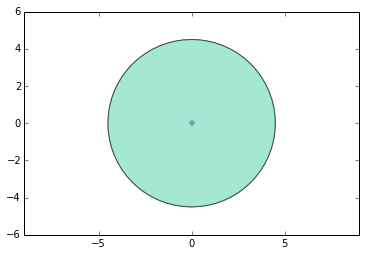

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch = des.PolygonPatch(standardEquivalentEllipse.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

patch = des.PolygonPatch(standardEquivalentEllipse.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

patch = des.PolygonPatch(standardEquivalentEllipse.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
ax.add_patch(patch)

plt.scatter(0,0)

ax.axis("equal")

In [11]:
basicGuess = StandardFitEllipse(x=XCoords, y=YCoords)

In [12]:
# weightedEquivalentEllipse.width

In [13]:
# weightedEquivalentEllipse.length

In [14]:
standardEquivalentEllipse.width

9.0000001890171646

In [15]:
standardEquivalentEllipse.length

9.0000001951256152

In [16]:
basicGuess.width

8.9999999893455129

In [17]:
basicGuess.length

9.0000000054461893